<div style="direction:rtl;text-align:center"><img src="https://dl.mohammadkh.ir/logo.png" alt="Mohammadkh.ir" style="width: 250px;"/></div>
<h1><div style="direction:rtl;text-align:center">Classification</div></h1>

In [1]:
from catboost import CatBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

## Iris

In [2]:
data = datasets.load_iris()
X = data.data[:, :2]  
y = data.target
# import pandas as pd
# y = pd.get_dummies(y)
X_Train, X_Test, y_Train ,y_Test = train_test_split(X, y, test_size=0.33, random_state=42)

In [3]:
Model = CatBoostClassifier(learning_rate=0.05, depth=6, verbose=1,task_type='GPU', 
                           save_snapshot=True, snapshot_file='SaveModel',
                           snapshot_interval=60, random_seed=1)
Model.fit(X_Train, y_Train, eval_set=(X_Test, y_Test), plot=True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

bestTest = 0.4926296234
bestIteration = 180
Shrink model to first 181 iterations.


In [4]:
Model.score(X_Test, y_Test)

0.78

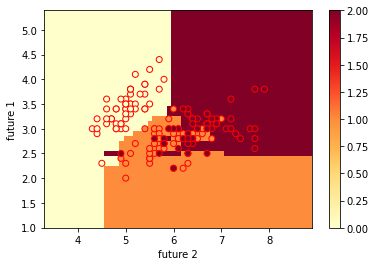

In [5]:
h=0.01
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = Model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx,yy,Z,cmap=plt.cm.YlOrRd)
plt.ylabel('future 1')
plt.xlabel('future 2')

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.YlOrRd,edgecolors="r")
plt.ylabel('future 1')
plt.xlabel('future 2')
plt.colorbar()

## mnist

In [6]:
data = datasets.load_digits()
X = data.images.reshape((len(data.images), -1))
y = data.target

X_Train, X_Test, y_Train ,y_Test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
Model = CatBoostClassifier(learning_rate=0.05, depth=6, verbose=1,
                          task_type='GPU', save_snapshot=True, snapshot_file='SaveModel1', snapshot_interval=60, random_seed=1)
Model.fit(X_Train, y_Train, eval_set=(X_Test, y_Test))

In [8]:
Model.score(X_Test, y_Test)

0.9797979797979798

<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:left"><strong>Classification</strong><br>MohammadReza <strong>Khajedaloi</strong><br><br>
</div>
<div style="direction:rtl;text-align:right">
<a href="http://mohammadkh.ir/">WebSite</a> - <a href="https://github.com/khajedaloi/">GitHub</a> - <a href="https://www.linkedin.com/in/mohammad-kh/">Linkedin</a>
</div>
</div>